# Derivatives and Partial Derivatives

With the idea of limits under our belts, we will explore one of their most useful applications in Calculus: the derivative. A **derivative** is a function that outputs the slope of another function. Measuring the rate of change at different parts of a function is useful in machine learning and data science applications, particularly in gradient descent and stochastic gradient descent. This is the *learning* part of machine learning and we will discuss this later. For now, let's get the building blocks in place first.

## Secant and Tangent Lines

Let's say you needed to find the slope of this function at $ x = 2 $. 

$
\Large f(x) = .75x^2
$

One way you can approximate this slope is by getting the point at $ x = 2 $ and then choosing a close neighbor to $ x $, like $ x = 3.5 $. We can then draw a ** secant line** through both points and get its slope using the rise-over-run formula. 

$
\Large m = \frac{x_2 - x_1}{y_2 - y_1}
$

We will bring this value in closer, but for now let's start the neighboring point at $ x_2 = 3.5 $. 

The slope is 4.125


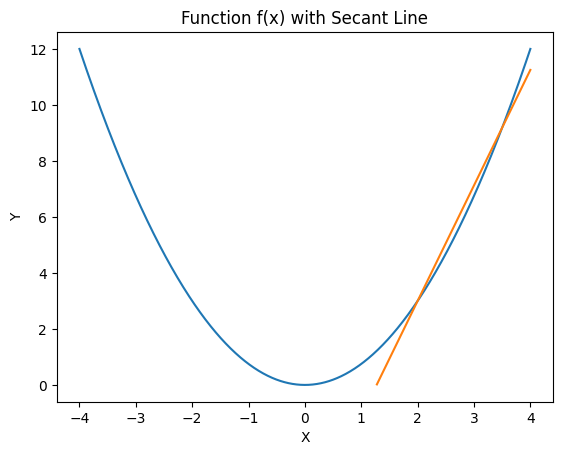

In [11]:
import matplotlib.pyplot as plt
import numpy as np 

def plot_with_secant(f, x1, x2): 
    
    # Define the interval for the x-axis
    x_vals = np.linspace(-4, 4, 1000)
    
    # Calculate the function values for the x-axis values
    y_vals = f(x_vals)
    
    # Create the plot
    plt.plot(x_vals, y_vals)
    
    # Define the secant line
    y1, y2 = f(x1), f(x2)
    
    # Calculate the slope of the secant line
    m = (y2 - y1) / (x2 - x1)
    print(f"The slope is {m}")
    
    # Calculate the y-intercept of the secant line
    b = y1 - m * x1
    
    # Draw the secant line
    x_secant = x_vals 
    y_secant = m*x_vals+b

    # chop off line to stay in range of parabola's y-axis 
    x_secant = x_secant[(y_secant <= np.max(y_vals)) & (y_secant >= np.min(y_vals))]
    y_secant = m*x_secant+b
    
    plt.plot(x_secant, y_secant)
    
    # Add labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Function f(x) with Secant Line')
    
    # Show the plot
    plt.show()

def f(x): return .75*x**2
    
plot_with_secant(f, 2, 3.5)

Now what happens if we bring that neighboring point in closer?

The slope is 3.75


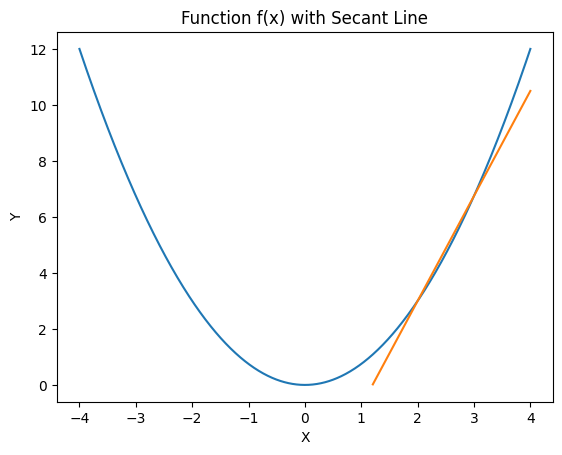

In [12]:
plot_with_secant(f,2,3)

The slope is 3.0749999999999984


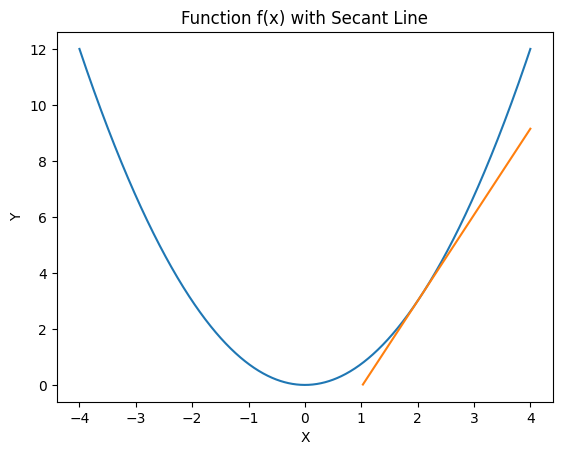

In [13]:
plot_with_secant(f, 2, 2.1)

The slope is 3.000750000000327


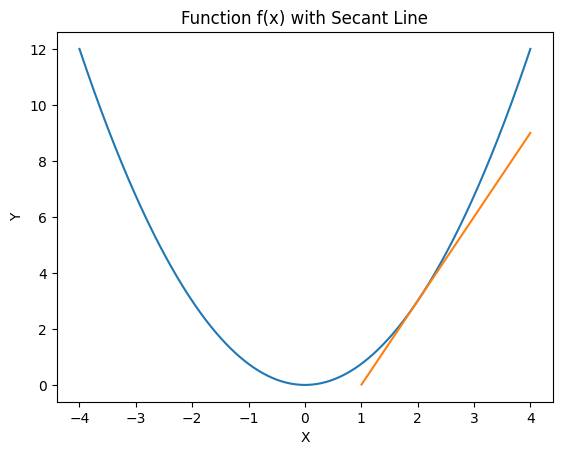

In [4]:
plot_with_secant(f, 2, 2.001)

More generally, if we have a function $ f(x) $ and we want to find the slope at a given $ x $, we can approximate it by drawing the **secant line** that also crosses a close neighboring point at $ x + h $. The slope of that secant line can be approximated by decreasing $ h $. 

$ 
\Large m = \frac{f(x + h) - f(x)}{(x + h) - x}
$

More properly, we can use a limit to forever decrease $ h $ towards 0 but never each 0. 

![lim](https://latex.codecogs.com/svg.image?&space;m=\lim_{x\to0}\frac{f(x&plus;h)-f(x)}{(x&plus;h)-x})

Let's substitute $ x = 2 $ into this formula, and calculate the limit by approaching $ h $ to 0. We can calculate cleanly that the slope is $ 3 $! The resulting line would no longer be a secant line, but rather a **tangent line** as we have converged both points using a limit. 

In [15]:
from sympy import * 

x,h = symbols('x h')

f = .75*x**2

# calculate the slope for x and its neighbor
m = (f.subs(x, x+h) - f) / (x+h - x)

# substitute x = 2 
m = m.subs(x, 2)

# calculate the slope by approaching h to 0 
limit(m,h,0)

3

We can generalize this and look up the slope for any given $ x $ value, simply by not subsituting a value for $ x $ in our limit. 

In [16]:
from sympy import * 

x,h = symbols('x h')

f = .75*x**2

# calculate the slope for x and its neighbor
m = (f.subs(x, x+h) - f) / (x+h - x)

# calculate the slope by approaching h to 0 
limit(m,h,0)

3*x/2

We get the derivative function: 

$ 
f'(x) = \frac{3}{2}x
$ 

In [6]:
from sympy import * 

x = symbols('x')
f = .75*x**2

dx_f = diff(f, x)
dx_f

1.5*x